In [16]:
%matplotlib inline

import quandl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from mpl_finance import candlestick_ohlc

from secrets import QUANDL_API_KEY


## Get set up and retrieve data

In [45]:
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EOD/AAPL')
df.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,169.549723,171.350648,169.481580,170.367440,20949896.0
2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,170.046194,170.770458,169.870969,170.367440,16349444.0
2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,166.269121,166.921347,165.177858,166.045222,33185536.0
2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,165.587690,166.249651,165.208036,166.074426,21498213.0
2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,166.463815,167.291267,165.957609,166.541693,16480187.0


## Plot price and volume

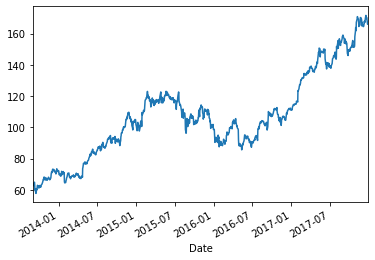

In [47]:
df['Adj_Close'].plot()

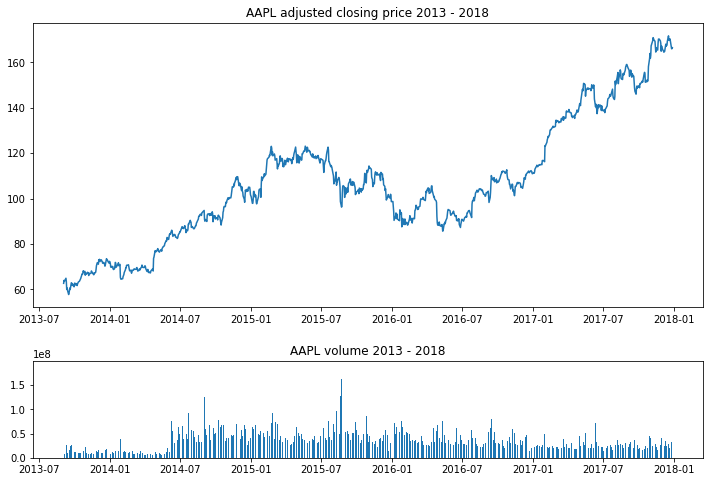

In [48]:
prices = df['Adj_Close']
volumes = df['Volume']

top = plt.subplot2grid((12,12), (0,0), rowspan=8, colspan=12)
top.plot(prices.index, prices, label='Adjusted Close')
plt.title('AAPL adjusted closing price 2013 - 2018')

bottom = plt.subplot2grid((12,12), (9,0), rowspan=3, colspan=12)
bottom.bar(volumes.index, volumes, label='Volume')
plt.title('AAPL volume 2013 - 2018')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)



In [49]:
df.index

DatetimeIndex(['2013-09-03', '2013-09-04', '2013-09-05', '2013-09-06',
               '2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12',
               '2013-09-13', '2013-09-16',
               ...
               '2017-12-14', '2017-12-15', '2017-12-18', '2017-12-19',
               '2017-12-20', '2017-12-21', '2017-12-22', '2017-12-26',
               '2017-12-27', '2017-12-28'],
              dtype='datetime64[ns]', name='Date', length=1090, freq=None)

In [40]:
# converts the index values containing the date and time,
# puts them in a new column as ohlc chart requires particuar formatting of Date

df['Date'] = df.index.map(mdates.date2num) 
ohlc = df[['Date', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close']]

df['Date'].head()


Date
2013-09-03    735114.0
2013-09-04    735115.0
2013-09-05    735116.0
2013-09-06    735117.0
2013-09-09    735120.0
Name: Date, dtype: float64

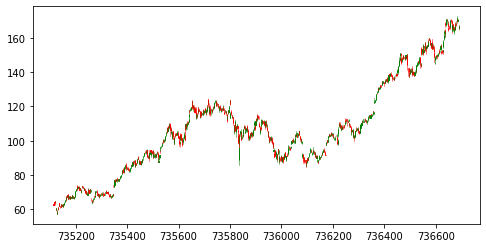

In [43]:
figure, ax = plt.subplots(figsize=(8,4))
candlestick_ohlc(ax, ohlc.values, colorup='green', colordown='red')

pass # to avoid all the printed output of string representations of matplotlib plots

## Plot simple stats


### plotting daily changes

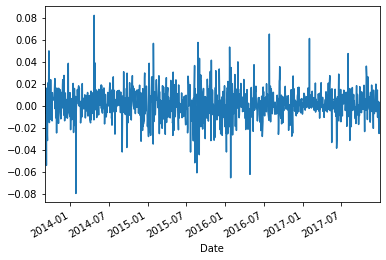

In [64]:
daily_changes = df['Adj_Close'].pct_change(periods=1) # periods=1 is default, not necessary here
daily_changes.plot()

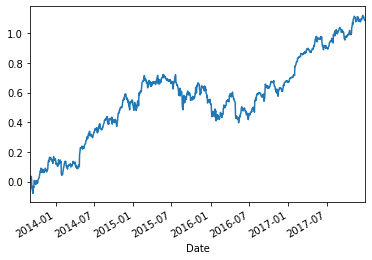

In [65]:
daily_changes.cumsum().plot()

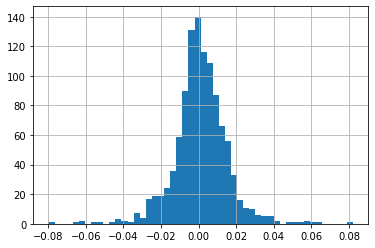

In [66]:
daily_changes.hist(bins=50)

In [67]:
daily_changes.describe()

count    1089.000000
mean        0.001000
std         0.014285
min        -0.079927
25%        -0.005857
50%         0.000766
75%         0.008594
max         0.081982
Name: Adj_Close, dtype: float64

### Plotting volatility

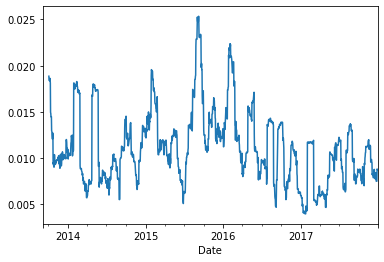

In [71]:
df_filled_close = df['Adj_Close'].asfreq('D', method='ffill')
df_percent_returns = df_filled.pct_change().dropna()
df_returns_std = df_percent_returns.rolling(window=30, min_periods=30).std()
df_returns_std.plot()

### Plotting 'Quantile-Quantile plot'

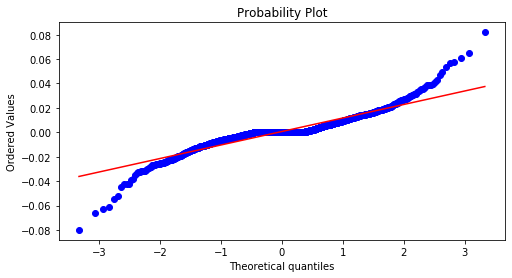

In [72]:
from scipy import stats
from scipy.stats import probplot

figure, ax = plt.subplots(figsize=(8,4))
stats.probplot(df_percent_returns, dist='norm', plot=ax)
plt.show();

### Plotting SMA

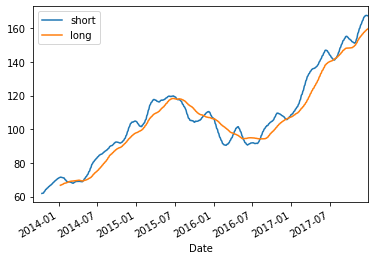

In [74]:
series_short = df['Adj_Close'].rolling(window=30, min_periods=30).mean()
series_long = df['Adj_Close'].rolling(window=90, min_periods=90).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long

df_sma.plot()

### Plotting EMA

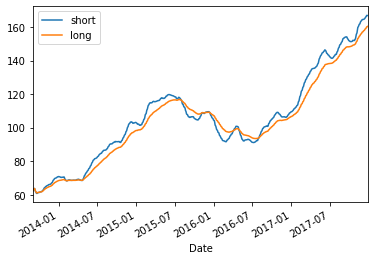

In [75]:
series_short = df['Adj_Close'].ewm(span=30).mean()
series_long = df['Adj_Close'].ewm(span=90).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long

df_sma.plot()

### Plotting stock comparisons

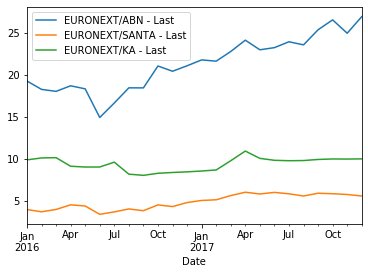

In [76]:
df = quandl.get(['EURONEXT/ABN.4', 
                 'EURONEXT/SANTA.4', 
                 'EURONEXT/KA.4'], 
                collapse='monthly', 
                start_date='2016-01-01', 
                end_date='2017-12-31')
df.plot();

In [77]:
df.pct_change().corr()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000


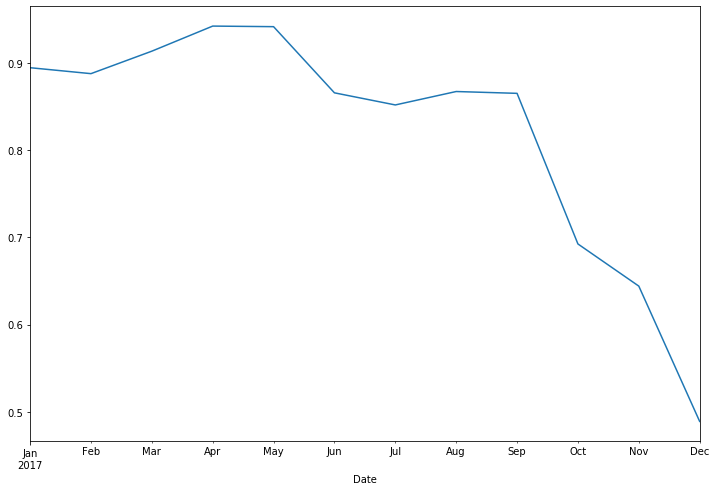

In [86]:
daily_changes= df.pct_change()

abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
window = int(len(daily_changes.index)/2) # avg number of days in year
df_corrs = abn_returns\
    .rolling(window=window, min_periods=window)\
    .corr(other=santa_returns)\
    .dropna()
df_corrs.plot(figsize=(12, 8));